## Analysis

1. Data Flow & sources
2. Database set-up
3. Movies per year
4. Movies without budget
5. Rev/Budger per year (line graph?)
6. % of movies with minorities in lead role vs. A-list celebrities per year (trend is increasing or dec)
7. Box office for minorities for the decade
8. Box office for A-list for the decade
9. 

In [76]:
from copy import deepcopy

In [325]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * FROM details JOIN movie_actors ON details.id = movie_actors.id""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]

cnx.commit()
c.close()
cnx.close()

In [326]:
import config
import mysql.connector
import pandas as pd

In [327]:
df.head()

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,actor,ethnicity
0,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Jessica Alba,non-white
1,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Joseph Gordon-Levitt,white
2,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Josh Brolin,white
3,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Mickey Rourke,white
4,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Rosario Dawson,non-white


In [328]:
df['year'] = df['release_date'].map(lambda x : x.year)

In [329]:
df.groupby(['year']).mean()

,id,budget,revenue,popularity,vote_average,vote_count,runtime,id
year,,,,,,,,
2010,43801.956638,2.405078e+07,6.086184e+07,9.515381,6.278747,1059.725910,102.331539,43801.956638
2011,65716.227128,2.294029e+07,6.023628e+07,9.376359,6.258777,1037.480851,100.720745,65716.227128
2012,97752.129580,2.191142e+07,6.713908e+07,9.669204,6.214923,1188.029740,103.197643,97752.129580
2013,152396.146381,2.358775e+07,6.562328e+07,10.335075,6.327346,1378.318499,104.745161,152396.146381
2014,222709.571201,2.190417e+07,6.989217e+07,11.666914,6.378321,1515.465462,104.333156,222709.571201
2015,288206.057219,2.114029e+07,7.335409e+07,10.769588,6.232941,1317.729412,104.694010,288206.057219
2016,328134.000000,2.593913e+07,7.629630e+07,11.506653,6.328759,1564.056948,107.254712,328134.000000
2017,401646.344532,8.973413e+06,2.390381e+07,9.822560,6.231022,513.690493,102.561555,401646.344532
2018,439251.416357,2.662842e+07,9.359867e+07,16.013885,6.459851,1272.011152,108.644195,439251.416357


In [330]:
df['budgetm'] = df['budget'].map(lambda x :x/1000000)

In [331]:
df

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,actor,ethnicity,year,budgetm
0,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Jessica Alba,non-white,2014,65.0
1,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Joseph Gordon-Levitt,white,2014,65.0
2,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Josh Brolin,white,2014,65.0
3,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Mickey Rourke,white,2014,65.0
4,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Rosario Dawson,non-white,2014,65.0
5,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Chris Evans,white,2011,140.0
6,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Hayley Atwell,white,2011,140.0
7,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Hugo Weaving,non-white,2011,140.0
8,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Sebastian Stan,white,2011,140.0
9,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Tommy Lee Jones,white,2011,140.0


In [332]:
df['revm'] = df['revenue'].map(lambda x : x/1000000)

In [333]:
# df.isna().sum()

In [334]:
sum(df.budget == 0)


6451

In [335]:
sum(df.budget >0)

9297

In [336]:
len(df)

15748

In [337]:
sum(df.budget == 0)/len(df)


0.40963931927863856

In [338]:
df['production_country'].value_counts()

US        10393
non-US     5355
Name: production_country, dtype: int64

In [339]:
df = df[df['production_country'] == 'US']

In [340]:
df

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,actor,ethnicity,year,budgetm,revm
0,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Jessica Alba,non-white,2014,65.0,39.407616
1,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Joseph Gordon-Levitt,white,2014,65.0,39.407616
2,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Josh Brolin,white,2014,65.0,39.407616
3,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Mickey Rourke,white,2014,65.0,39.407616
4,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Rosario Dawson,non-white,2014,65.0,39.407616
5,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Chris Evans,white,2011,140.0,370.569774
6,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Hayley Atwell,white,2011,140.0,370.569774
7,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Hugo Weaving,non-white,2011,140.0,370.569774
8,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Sebastian Stan,white,2011,140.0,370.569774
9,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Tommy Lee Jones,white,2011,140.0,370.569774


In [341]:
df['language'].value_counts()

en    10342
es       15
fr       10
ja       10
de        5
it        5
el        4
zh        2
Name: language, dtype: int64

In [342]:
df[df['language'] != 'en']

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,actor,ethnicity,year,budgetm,revm
380,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Adrien Brody,white,2010,14.00,0.000000
381,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Elsa Pataky,None,2010,14.00,0.000000
382,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Emmanuelle Seigner,None,2010,14.00,0.000000
383,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Robert Miano,None,2010,14.00,0.000000
384,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Valentina Izumi,None,2010,14.00,0.000000
1684,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Hayley Kiyoko,non-white,2010,0.00,0.000000
1685,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Kate Melton,None,2010,0.00,0.000000
1686,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Nick Palatas,None,2010,0.00,0.000000
1687,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Robbie Amell,white,2010,0.00,0.000000
1688,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Ted McGinley,None,2010,0.00,0.000000


In [343]:
df = df[df['language'] == 'en']

In [344]:
df['revm'].value_counts()

0.000000       3184
3.566225          5
894.027543        5
471.222889        5
212.902372        5
1091.405097       5
0.049970          5
192.330738        5
69.929545         5
55.003890         5
0.011774          5
299.457024        5
201.585328        5
86.362372         5
3.538446          5
132.274484        5
4.077333          5
97.594140         5
484.635760        5
8.784318          5
16.872691         5
3.665069          5
5.400000          5
45.236543         5
0.169209          5
79.700000         5
0.382946          5
216.485654        5
37.930465         5
543.514353        5
               ... 
51.029361         5
18.850674         5
56.303596         5
3.317662          5
112.483764        5
752.600867        5
0.052604          5
40.547440         5
7.644937          5
229.147509        5
187.361754        5
0.004526          5
1.710528          5
73.983359         5
100.176000        5
25.182929         5
3.099314          5
0.851517          5
51.854875         5


In [345]:
import seaborn as sns

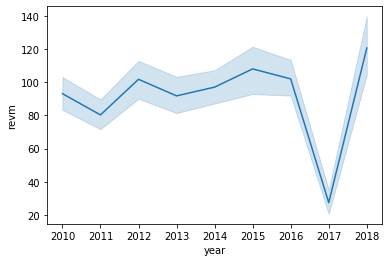

In [346]:
sns.lineplot(x = 'year', y = 'revm', data=df)

In [122]:
df.groupby('year').mean()

,id,budget,revenue,popularity,vote_average,vote_count,runtime,budgetm,revm
year,,,,,,,,,
2010,37808.905172,3.439426e+07,9.157113e+07,10.554220,6.179741,1511.818966,97.737069,34.394257,91.571131
2011,62854.868726,3.006775e+07,7.959732e+07,9.890266,6.145946,1293.351351,98.861004,30.067747,79.597325
2012,87209.686695,3.214402e+07,1.014576e+08,10.643069,6.122747,1721.931330,100.957082,32.144017,101.457628
2013,138387.576000,3.208671e+07,9.074596e+07,11.229920,6.202000,1801.196000,102.224000,32.086713,90.745960
2014,211567.448669,2.879278e+07,9.641293e+07,12.838525,6.290494,1886.418251,102.680608,28.792776,96.412933
2015,269836.531381,2.999640e+07,1.072699e+08,12.028607,6.121757,1801.845188,103.669456,29.996403,107.269891
2016,310948.600000,3.471542e+07,1.015303e+08,12.301404,6.267083,2008.879167,106.799163,34.715417,101.530278
2017,373331.272727,3.149868e+07,1.093488e+08,13.276587,6.299587,1867.285124,105.053719,31.498677,109.348811
2018,422486.272277,3.452405e+07,1.205131e+08,17.483559,6.420792,1575.326733,108.386139,34.524052,120.513064


In [123]:
sum(df.revm == 0)/len(df)


0.3037037037037037

In [124]:
len(df[(df['revm'] == 0) | (df['budget'] == 0)])/len(df)



0.40046296296296297

In [125]:
len(df)

2160

In [126]:
len(df[(df['revm'] == 0) | (df['budget'] == 0)])

865

In [127]:
major_movies = df[(df['revm'] != 0) & (df['budget'] != 0)]

In [128]:
len(major_movies)

1295

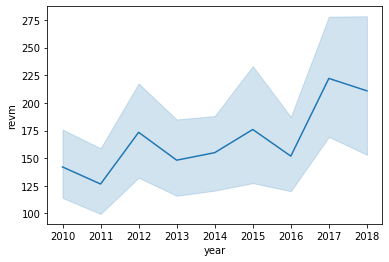

In [145]:
sns.lineplot(x = 'year', y = 'revm', data=major_movies)

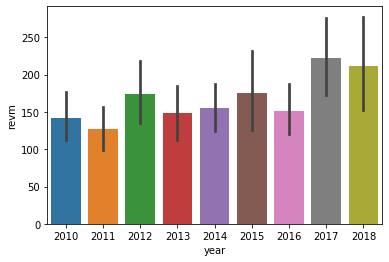

In [147]:
sns.barplot(x='year', y='revm', data= major_movies)

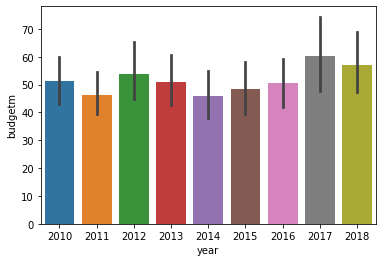

In [148]:
sns.barplot(x='year', y='budgetm', data= major_movies)

In [1]:
import config
import mysql.connector
import pandas as pd

In [3]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * FROM actors""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [4]:
df.nonwhite.value_counts(normalize=True)

white        0.889489
non-white    0.110511
Name: nonwhite, dtype: float64

In [5]:
most_common_ethnicities = df.groupby(['ethnicity', 'nonwhite']).count().sort_values(by='name', ascending = False)

In [6]:
most_common_ethnicities[:25]

,,name
ethnicity,nonwhite,
English,white,1063
German,white,653
Irish,white,649
Scottish,white,548
Ashkenazi Jewish,white,287
Welsh,white,208
French,white,206
Northern Irish,white,179
Italian,white,172


In [7]:
number_ethnicities = df.count()['ethnicity']
number_ethnicities

5927

In [8]:
number_actors = df['name'].nunique()
number_actors

1909

In [9]:
ethnicities_per_actor = round(number_ethnicities/number_actors)
ethnicities_per_actor

3.0

In [10]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT DISTINCT a.name, IF(ISNULL(a1.name), a2.nonwhite, a1.nonwhite) AS minority FROM actors a
LEFT JOIN (SELECT DISTINCT name, nonwhite FROM actors WHERE nonwhite='non-white') a1
ON a.name = a1.name
LEFT JOIN (SELECT DISTINCT name, nonwhite FROM actors WHERE nonwhite='white') a2
ON a.name = a2.name""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [11]:
df.minority.value_counts()

white        1408
non-white     501
Name: minority, dtype: int64

In [12]:
df.sample(10)

,name,minority
230,Rosa Salazar,non-white
1862,Michael Angarano,white
923,Peter McRobbie,white
682,Natalie Portman,white
717,Bob Odenkirk,white
1775,Navid Negahban,non-white
1668,Scott Speedman,white
1388,Rutger Hauer,white
161,Amber Heard,white
1589,Jeff Bridges,white


In [2]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * FROM filtered_movies""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [3]:
# df

,movie_name,budget,revenue,release_date,vote_average,vote_count,runtime,production_country,language,actor_name,ethnicity
0,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Jessica Alba,non-white
1,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Joseph Gordon-Levitt,white
2,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Josh Brolin,white
3,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Mickey Rourke,white
4,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Rosario Dawson,non-white
5,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Chris Evans,white
6,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hayley Atwell,white
7,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hugo Weaving,non-white
8,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Sebastian Stan,white
9,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Tommy Lee Jones,white


In [4]:
df['budgetm'] = df['budget'].map(lambda x :x/1000000)

In [5]:
df['revm'] = df['revenue'].map(lambda x :x/1000000)

In [17]:
# df

,movie_name,budget,revenue,release_date,vote_average,vote_count,runtime,production_country,language,actor_name,ethnicity,budgetm,revm
0,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Jessica Alba,non-white,65.000000,39.407616
1,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Joseph Gordon-Levitt,white,65.000000,39.407616
2,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Josh Brolin,white,65.000000,39.407616
3,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Mickey Rourke,white,65.000000,39.407616
4,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Rosario Dawson,non-white,65.000000,39.407616
5,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Chris Evans,white,140.000000,370.569774
6,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hayley Atwell,white,140.000000,370.569774
7,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hugo Weaving,non-white,140.000000,370.569774
8,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Sebastian Stan,white,140.000000,370.569774
9,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Tommy Lee Jones,white,140.000000,370.569774


In [6]:
df['year'] = df['release_date'].map(lambda x : x.year)

In [15]:
df

,movie_name,budget,revenue,release_date,vote_average,vote_count,runtime,production_country,language,actor_name,ethnicity,budgetm,revm,year
0,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Jessica Alba,non-white,65.000000,39.407616,2014
1,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Joseph Gordon-Levitt,white,65.000000,39.407616,2014
2,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Josh Brolin,white,65.000000,39.407616,2014
3,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Mickey Rourke,white,65.000000,39.407616,2014
4,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Rosario Dawson,non-white,65.000000,39.407616,2014
5,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Chris Evans,white,140.000000,370.569774,2011
6,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hayley Atwell,white,140.000000,370.569774,2011
7,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hugo Weaving,non-white,140.000000,370.569774,2011
8,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Sebastian Stan,white,140.000000,370.569774,2011
9,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Tommy Lee Jones,white,140.000000,370.569774,2011


In [16]:
movies_by_year = df[['movie_name', 'year']]

In [18]:
movies_by_year

,movie_name,year
0,Sin City: A Dame to Kill For,2014
1,Sin City: A Dame to Kill For,2014
2,Sin City: A Dame to Kill For,2014
3,Sin City: A Dame to Kill For,2014
4,Sin City: A Dame to Kill For,2014
5,Captain America: The First Avenger,2011
6,Captain America: The First Avenger,2011
7,Captain America: The First Avenger,2011
8,Captain America: The First Avenger,2011
9,Captain America: The First Avenger,2011


In [19]:
movies_by_year.drop_duplicates(inplace=True)

/Users/kathringo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
movies_by_year.reset_index(inplace=True)

In [20]:
movies_by_year.columns

Index(['movie_name', 'year'], dtype='object')

In [31]:
movies_by_year = movies_by_year.groupby('year')

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [35]:
movies_by_year = movies_by_year.count()

In [36]:
movies_by_year.reset_index(inplace=True)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# palette = sns.color_palette(sns.cubehelix_palette(8))

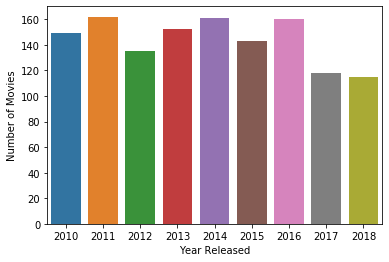

In [37]:
ax = sns.barplot(x='year', y='movie_name', data = movies_by_year)
ax.set(xlabel='Year Released', ylabel='Number of Movies')
plt.show()

## Number of White and Non-White Actors and Actresses by Year

In [38]:
count_by_ethnicity = df.groupby(['year', 'ethnicity']).count()

In [39]:
count_by_ethnicity.reset_index(inplace=True)

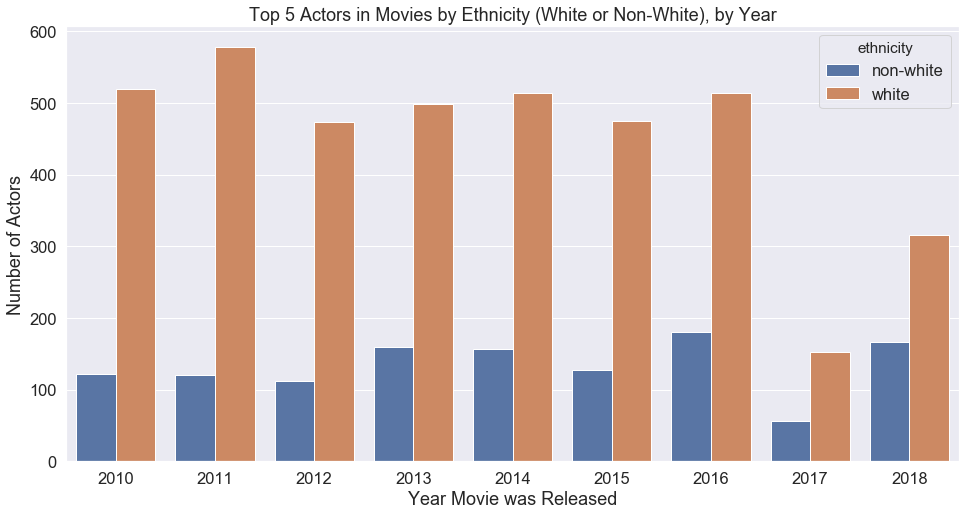

In [234]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='year', y='movie_name', hue='ethnicity', data = count_by_ethnicity)
ax.set(xlabel='Year Movie was Released', ylabel='Number of Actors')
plt.title('Top 5 Actors in Movies by Ethnicity (White or Non-White), by Year')
plt.show()

## Number of White and Non-White Actors and Actresses by Year

In [41]:
mean_by_year_ethnicity = df.groupby(['year', 'ethnicity']).mean()

In [42]:
mean_by_year_ethnicity.reset_index(inplace=True)

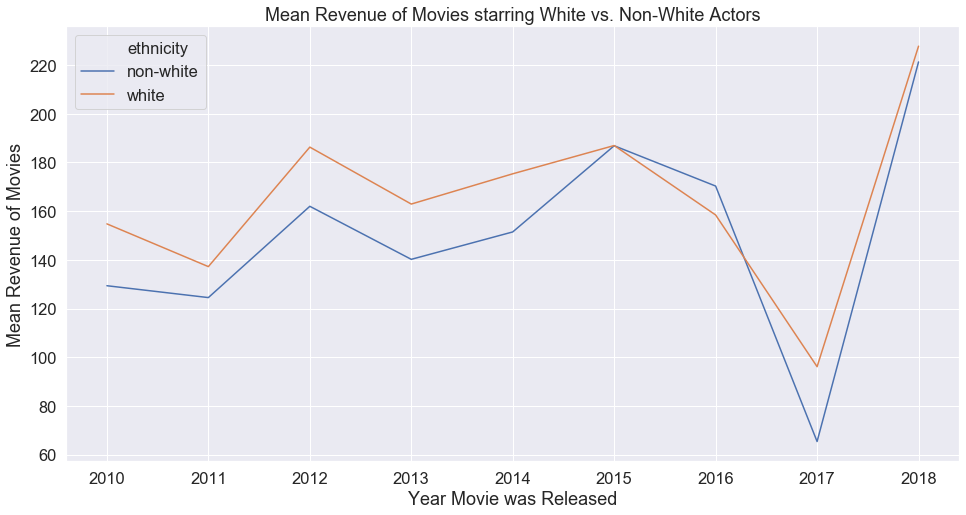

In [237]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='year', y='revm', hue='ethnicity', data=mean_by_year_ethnicity)
ax.set(xlabel='Year Movie was Released', ylabel='Mean Revenue of Movies')
plt.title('Mean Revenue of Movies starring White vs. Non-White Actors')
plt.show()

In [45]:
df['rev_over_bud'] = df['revm']/df['budgetm']

In [57]:
revised_df = df[df.movie_name != 'Nurse 3-D']

In [67]:
revised_df = revised_df[revised_df.movie_name != 'From Prada to Nada']

In [69]:
mean_by_year_ethnicity = revised_df.groupby(['year', 'ethnicity']).mean()

In [70]:
mean_by_year_ethnicity.reset_index(inplace=True)

In [74]:
# revised_df[(revised_df['year']==2011) & (revised_df['rev_over_bud'] > 10)]

In [73]:
# mean_by_year_ethnicity

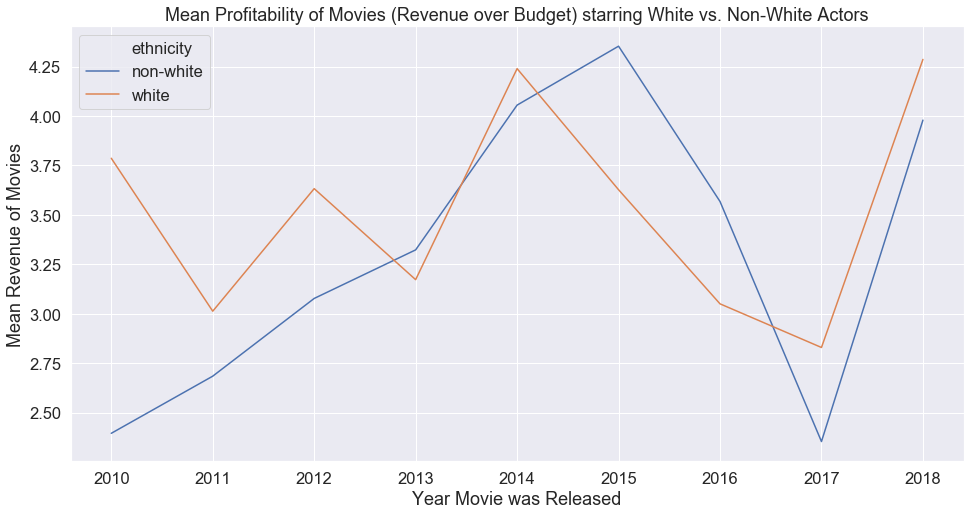

In [238]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='year', y='rev_over_bud', hue='ethnicity', data=mean_by_year_ethnicity)
ax.set(xlabel='Year Movie was Released', ylabel='Mean Revenue of Movies')
plt.title('Mean Profitability of Movies (Revenue over Budget) starring White vs. Non-White Actors')
plt.show()

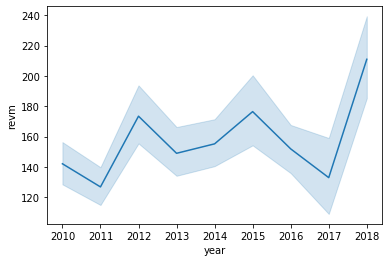

In [44]:
sns.lineplot(x = 'year', y = 'revm', data=df)

In [75]:
revised_df['made_money'] = revised_df['rev_over_bud'].apply(lambda x: True if x > 1 else False) 

/Users/kathringo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
revised_df

,movie_name,budget,revenue,release_date,vote_average,vote_count,runtime,production_country,language,actor_name,ethnicity,budgetm,revm,year,rev_over_bud,made_money
0,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Jessica Alba,non-white,65.000000,39.407616,2014,0.606271,False
1,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Joseph Gordon-Levitt,white,65.000000,39.407616,2014,0.606271,False
2,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Josh Brolin,white,65.000000,39.407616,2014,0.606271,False
3,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Mickey Rourke,white,65.000000,39.407616,2014,0.606271,False
4,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Rosario Dawson,non-white,65.000000,39.407616,2014,0.606271,False
5,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Chris Evans,white,140.000000,370.569774,2011,2.646927,True
6,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hayley Atwell,white,140.000000,370.569774,2011,2.646927,True
7,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hugo Weaving,non-white,140.000000,370.569774,2011,2.646927,True
8,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Sebastian Stan,white,140.000000,370.569774,2011,2.646927,True
9,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Tommy Lee Jones,white,140.000000,370.569774,2011,2.646927,True


In [79]:
avg_by_year_ethnicity = revised_df.groupby(['year', 'ethnicity']).mean()

In [83]:
avg_by_year_ethnicity.reset_index(inplace=True)

In [248]:
abc = avg_by_year_ethnicity.set_index(['year','ethnicity'])[['budgetm', 'revm', 'made_money']]

[]

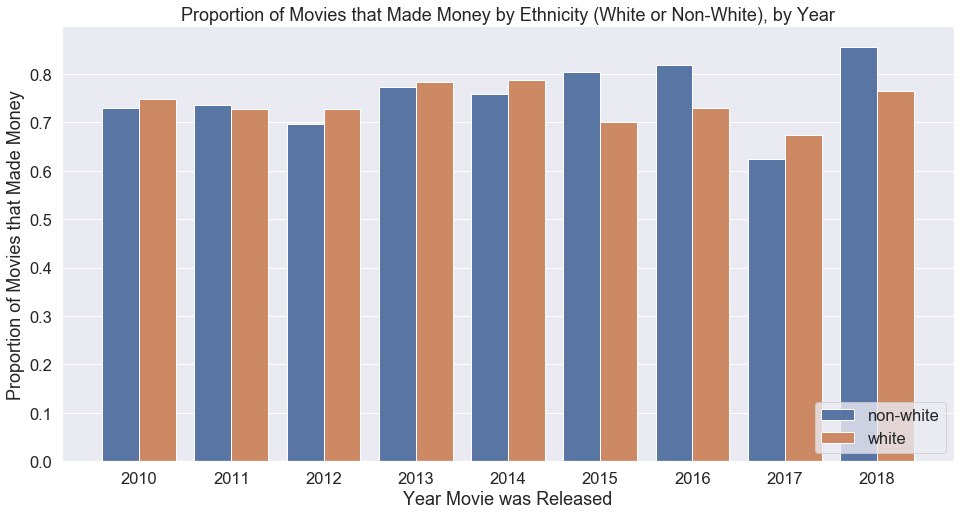

In [233]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='year', y='made_money', hue='ethnicity', data=avg_by_year_ethnicity)
plt.legend(loc = 'lower right')
ax.set(xlabel='Year Movie was Released', ylabel='Proportion of Movies that Made Money')
plt.title('Proportion of Movies that Made Money by Ethnicity (White or Non-White), by Year')
plt.plot()

In [116]:
amount_spend_on_failed_movies = revised_df.groupby(['movie_name', 'year', 'made_money']).mean()

In [117]:
abc = amount_spend_on_failed_movies.groupby(['year', 'made_money']).sum()

In [121]:
# abc

In [119]:
abc.reset_index(inplace=True)

In [124]:
lost_money = abc[abc['made_money']==True]

In [125]:
lost_money

,year,made_money,budget,revenue,vote_average,vote_count,runtime,budgetm,revm,rev_over_bud
1,2010,True,6.733318e+09,2.065046e+10,700.1,303345,11821.0,6733.317650,20650.459367,623.996411
3,2011,True,6.340020e+09,1.997881e+10,736.8,286653,12556.0,6340.020202,19978.809855,510.513915
5,2012,True,6.244300e+09,2.277952e+10,628.8,345039,10782.0,6244.300000,22779.516807,551.318839
7,2013,True,6.597420e+09,2.201218e+10,740.0,383309,12730.0,6597.420000,22012.184264,454.558909
9,2014,True,6.691800e+09,2.453264e+10,801.7,422297,13551.0,6691.800000,24532.639531,705.220223
11,2015,True,5.974600e+09,2.464408e+10,671.6,367197,11697.0,5974.600003,24644.078985,976.677504
13,2016,True,6.987900e+09,2.367768e+10,769.8,404927,13053.0,6987.900000,23677.684153,507.995143
15,2017,True,6.524500e+09,2.587521e+10,646.7,376225,11047.0,6524.500000,25875.210357,514.601751
17,2018,True,5.741628e+09,2.377909e+10,599.0,254288,10199.0,5741.628355,23779.088892,515.714273


In [363]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * from details
JOIN genre
ON details.id = genre.id;""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [364]:
revised_df = df[df.name != 'Nurse 3-D']

In [365]:
revised_df = revised_df[revised_df.name != 'From Prada to Nada']

In [366]:
revised_df['revenue_millions'] = revised_df['revenue'].map(lambda x :round(x/1000000,0))

In [367]:
revised_df['budget_millions'] = revised_df['budget'].map(lambda x :round(x/1000000,0))

In [368]:
revised_df['year'] = revised_df['release_date'].map(lambda x : x.year)

In [369]:
revised_df = revised_df[revised_df.budget_millions >= 1]

In [370]:
revised_df['profitability'] = round(revised_df['revenue_millions']/revised_df['budget_millions'],0)

In [371]:
revised_df = revised_df[revised_df.language == 'en']

In [372]:
revised_df = revised_df[revised_df.production_country == 'US']

In [373]:
revised_df[revised_df['profitability'] > 100]

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,genre,revenue_millions,budget_millions,year,profitability
807,76487,tt1560985,The Devil Inside,1000000.0,101758490.0,7.079,2012-01-06,4.7,458,83.0,US,en,76487,Horror,102.0,1.0,2012,102.0


In [374]:
mean_by_genre = revised_df.groupby('genre').mean()

In [375]:
mean_by_genre.reset_index(inplace=True)

In [376]:
mean_by_genre.set_index('genre')[['revenue_millions', 'budget_millions', 'profitability']]

,revenue_millions,budget_millions,profitability
genre,,,
Action,235.398058,72.504854,2.466019
Adventure,369.075949,102.987342,3.139241
Animation,297.000000,79.150000,3.250000
Comedy,151.943396,43.061321,3.382075
Crime,97.046512,37.918605,2.255814
Documentary,3.666667,3.000000,1.666667
Drama,68.419929,27.088968,2.935943
Family,309.927711,84.072289,3.204819
Fantasy,365.847059,111.658824,3.152941


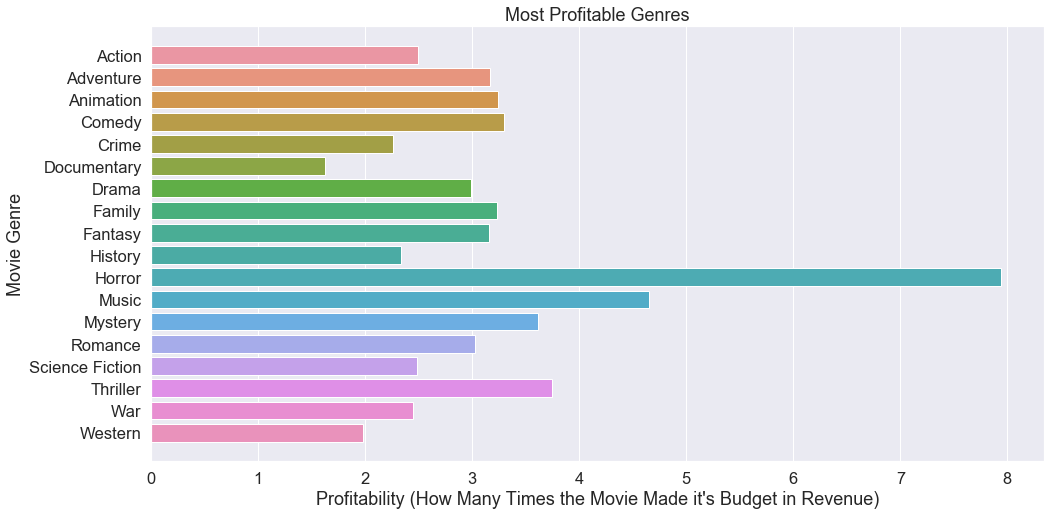

In [303]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.barplot(y='genre', x='rev_over_bud', data=mean_by_genre)
ax.set(xlabel='Profitability (How Many Times the Movie Made it\'s Budget in Revenue)', ylabel='Movie Genre')
plt.title('Most Profitable Genres')
# plt.legend()
plt.plot();

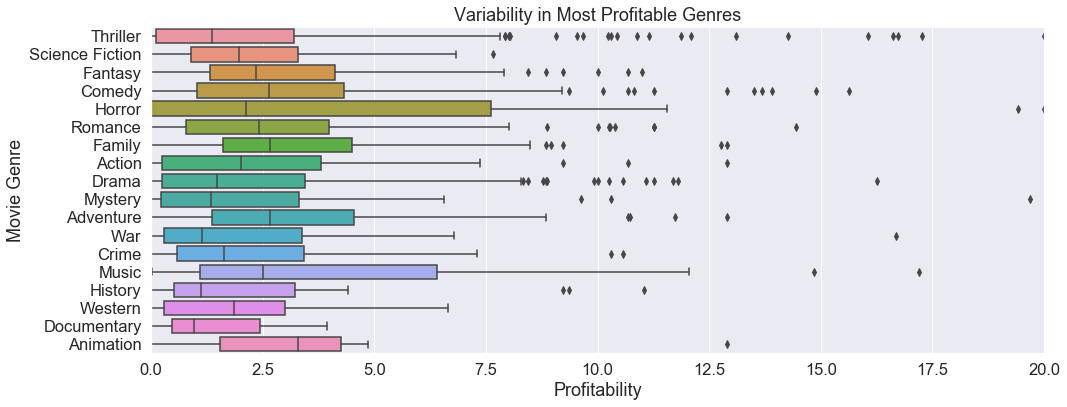

In [304]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 6))
ax = sns.boxplot(y='genre', x='rev_over_bud', data=revised_df)
ax.set(xlabel='Profitability', ylabel='Movie Genre')
ax.set(xlim=(0, 20))
plt.title('Variability in Most Profitable Genres')
plt.plot();

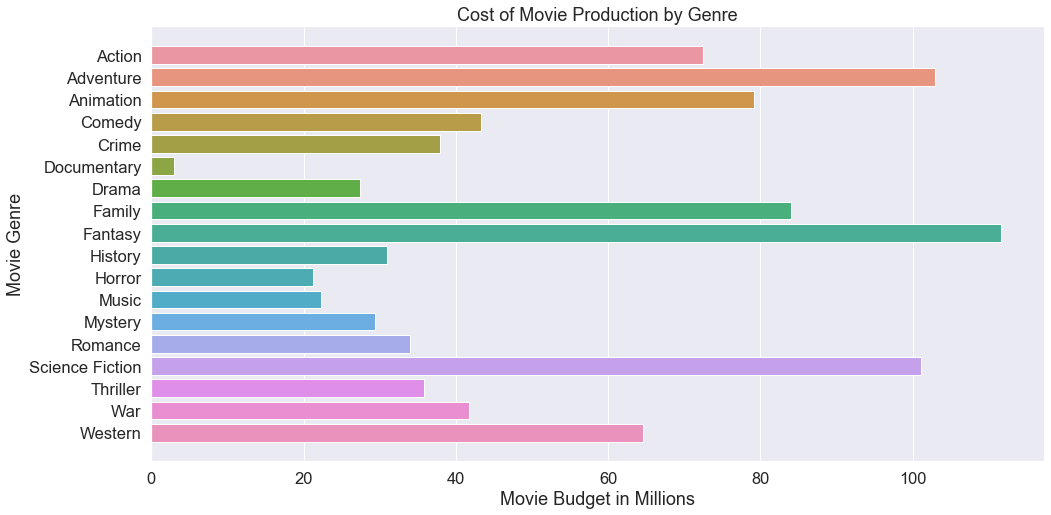

In [305]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.barplot(y='genre', x='budgetm', data=mean_by_genre)
ax.set(xlabel='Movie Budget in Millions', ylabel='Movie Genre')
plt.title('Cost of Movie Production by Genre')
# plt.legend()
plt.plot();

In [272]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT actor, ethnicity, c.* FROM movie_actors JOIN (SELECT b.*, genre.genre FROM genre JOIN 
(SELECT id, name, budget, revenue, release_date, 
revenue / budget as profitability FROM details WHERE 
revenue / budget >1 AND budget > 1000000 ORDER BY revenue / budget DESC) AS b
WHERE b.id = genre.id) c ON movie_actors.id = c.id;""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()





True

In [273]:
df

,actor,ethnicity,id,name,budget,revenue,release_date,profitability,genre
0,Chris Evans,white,1771,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,2.646927,Science Fiction
1,Hayley Atwell,white,1771,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,2.646927,Science Fiction
2,Hugo Weaving,non-white,1771,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,2.646927,Science Fiction
3,Sebastian Stan,white,1771,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,2.646927,Science Fiction
4,Tommy Lee Jones,white,1771,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,2.646927,Science Fiction
5,Geoffrey Rush,white,1865,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011-05-14,2.751878,Fantasy
6,Ian McShane,white,1865,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011-05-14,2.751878,Fantasy
7,Johnny Depp,white,1865,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011-05-14,2.751878,Fantasy
8,Kevin McNally,white,1865,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011-05-14,2.751878,Fantasy
9,Penélope Cruz,None,1865,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011-05-14,2.751878,Fantasy


In [274]:
actors = df.dropna()

In [316]:
actors[actors['actor'] == 'Alfre Woodard']

,actor,ethnicity,id,name,budget,revenue,release_date,profitability,genre
3475,Alfre Woodard,non-white,250546,Annabelle,6500000.0,257047661.0,2014-10-02,39.545794,Horror


In [307]:
blockbuster_actors = actors.groupby(['genre', 'ethnicity', 'actor']).mean()

In [308]:
blockbuster_actors.reset_index(inplace=True)

In [320]:
blockbuster_actors = blockbuster_actors.sort_values('profitability', ascending=False)[['genre', 'actor', 'ethnicity', 'profitability']][:20]

In [321]:
blockbuster_actors.set_index('actor')

,genre,ethnicity,profitability
actor,,,
Rose Byrne,Thriller,white,64.672767
Ty Simpkins,Thriller,white,64.672767
Katie Featherston,Thriller,white,59.170677
Molly Ephraim,Thriller,white,59.170677
Barbara Hershey,Thriller,white,44.944219
Tony Amendola,Horror,white,39.545794
Alfre Woodard,Horror,non-white,39.545794
Eric Ladin,Horror,white,39.545794
Annabelle Wallis,Horror,white,39.545794


In [276]:
blockbuster_actors = actors.groupby(['genre', 'ethnicity']).mean()

In [277]:
blockbuster_actors.reset_index(inplace=True)

,genre,ethnicity,id,budget,revenue,profitability
0,Action,non-white,199274.968750,5.820312e+07,2.378662e+08,3.515867
1,Action,white,163934.243902,7.807967e+07,2.761187e+08,3.640137
2,Adventure,non-white,201832.130435,1.168478e+08,4.020152e+08,3.446052
3,Adventure,white,170288.865385,1.049904e+08,4.196573e+08,3.745861
4,Animation,non-white,314476.200000,7.180000e+07,2.803256e+08,3.615345
5,Animation,white,256595.675000,8.585202e+07,3.463286e+08,4.002319
6,Comedy,non-white,238345.293103,4.199943e+07,1.596887e+08,4.238847
7,Comedy,white,198837.202505,4.762450e+07,1.870715e+08,4.201386
8,Crime,non-white,193822.000000,3.676275e+07,9.929707e+07,2.851359
9,Crime,white,153687.012658,4.037001e+07,1.122436e+08,2.822703


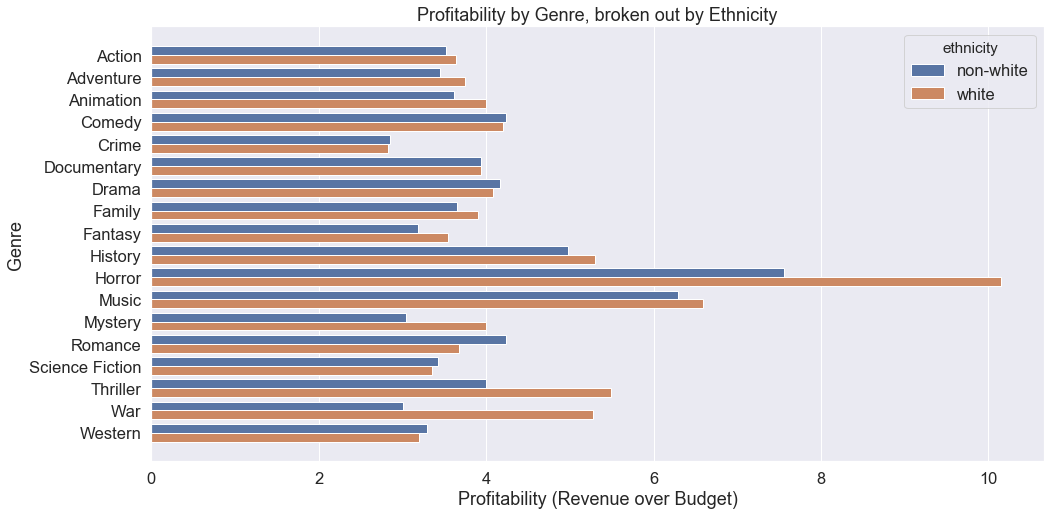

In [279]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.barplot(y='genre', x='profitability',hue='ethnicity',data=blockbuster_actors)
ax.set(xlabel='Profitability (Revenue over Budget)', ylabel='Genre')
plt.title('Profitability by Genre, broken out by Ethnicity')
# plt.legend()
plt.plot();

In [282]:
actors_in_genre = actors.groupby(['genre', 'ethnicity']).count()

In [284]:
actors_in_genre.reset_index(inplace=True)

In [285]:
actors_in_genre

,genre,ethnicity,actor,id,name,budget,revenue,release_date,profitability
0,Action,non-white,32,32,32,32,32,32,32
1,Action,white,123,123,123,123,123,123,123
2,Adventure,non-white,46,46,46,46,46,46,46
3,Adventure,white,156,156,156,156,156,156,156
4,Animation,non-white,10,10,10,10,10,10,10
5,Animation,white,40,40,40,40,40,40,40
6,Comedy,non-white,174,174,174,174,174,174,174
7,Comedy,white,479,479,479,479,479,479,479
8,Crime,non-white,51,51,51,51,51,51,51
9,Crime,white,158,158,158,158,158,158,158


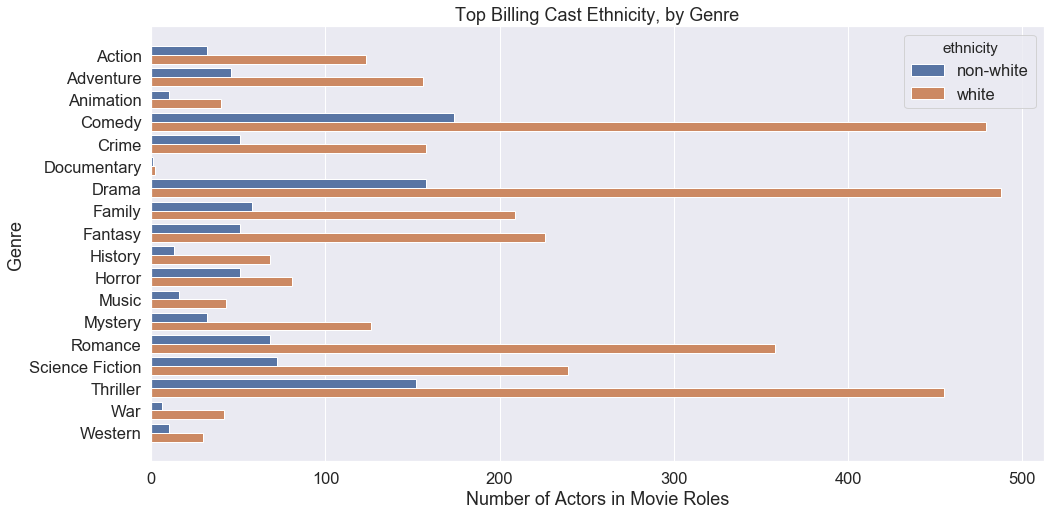

In [288]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.barplot(y='genre', x='actor',hue='ethnicity',data=actors_in_genre)
ax.set(xlabel='Number of Actors in Movie Roles', ylabel='Genre')
plt.title('Top Billing Cast Ethnicity, by Genre')
# plt.legend()
plt.plot();